#Imports

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Scaling & silhouette
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Standard Scaler - KMeans 실루엣 시작.

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/시소프로젝트/1-1 excellent 컷오프 완료.csv')
df2.reset_index()
df2 = df2.iloc[:,1:]
df2.head(1)

,자치구,동,센터명,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,...,일반,65세이상고령자,전연령별독거노인비율,노인인구별독거노인비율,X,Y,위도UTMK,경도UTMK,디지털정보지수,총합 9
0,종로구,사직동,사직동 주민센터,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,...,520,1843,6.016724,32.013022,37.576191,126.968829,1.952806e+06,953286.588072,9168.42,62.0


In [ ]:
df2.drop(columns=['합계','일반','65세이상고령자','노인인구별독거노인비율','X','Y','위도UTMK','경도UTMK','총합 9'],inplace=True)

In [ ]:
df2

,자치구,동,센터명,공원수,도서관수,병원수,배움터수,동별강좌정원,사고건수,독거노인포함,대중교통,전연령별독거노인비율,디지털정보지수
0,종로구,사직동,사직동 주민센터,1.0,2.0,0.0,0.0,50.0,0.0,1087370.0,1.0,6.016724,9168.42
1,종로구,종로1.2.3.4가동,종로1.2.3.4가동 주민센터,1.0,0.0,1.0,2.0,360.0,0.0,2558435.0,5.0,15.210701,6455.13
2,종로구,삼청동,삼청동 주민센터,0.0,1.0,0.0,0.0,0.0,0.0,161760.0,3.0,8.250258,2243.48
3,종로구,이화동,이화동 주민센터,2.0,0.0,0.0,1.0,0.0,0.0,718820.0,0.0,6.263099,7323.87
4,종로구,혜화동,혜화동 주민센터,0.0,0.0,0.0,0.0,37.0,0.0,2135562.0,3.0,3.982974,17054.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,영등포구,당산1동,당산1동 영등포구청,0.0,0.0,0.0,0.0,170.0,6.0,2670108.0,5.0,3.764684,20953.38
328,동작구,노량진2동,노량진2동 동작구청,0.0,1.0,0.0,1.0,15.0,0.0,2413815.0,3.0,6.623742,10457.07
329,관악구,청룡동,청룡동 관악구청,0.0,0.0,0.0,0.0,443.0,3.0,5942970.0,2.0,3.672402,39840.23
330,서초구,서초2동,서초2동 서초구청,0.0,0.0,0.0,1.0,489.0,0.0,943800.0,3.0,1.670425,28298.14


In [ ]:
df2['주변특성'] = None
df2['주변특성'] = df2['공원수']+df2['도서관수']+df2['병원수']+df2['배움터수']

In [ ]:
df2.drop(columns=['공원수','도서관수','병원수','배움터수','사고건수'],inplace=True)

In [ ]:
df2 = df2.iloc[:,3:]

In [ ]:
column = df2.columns
column

Index(['동별강좌정원', '독거노인포함', '대중교통', '전연령별독거노인비율', '디지털정보지수', '주변특성'], dtype='object')

In [ ]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns = column)
df2_scaled.head(1)

,동별강좌정원,독거노인포함,대중교통,전연령별독거노인비율,디지털정보지수,주변특성
0,-0.746355,-1.136415,-0.447988,0.925393,-1.618131,1.708


In [ ]:
df3 = df2_scaled.copy()
df3.head(1)

,동별강좌정원,독거노인포함,대중교통,전연령별독거노인비율,디지털정보지수,주변특성
0,-0.746355,-1.136415,-0.447988,0.925393,-1.618131,1.708


## KMeans 실루엣 시작.

In [ ]:
print('k = 2 일때')
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(df2_scaled)
df3['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df2_scaled, df3['cluster'])
# print(score_samples.shape)
# print(score_samples)
df3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df2_scaled, df3['cluster'])
print(average_score)
print(df3.groupby('cluster')['silhoutte_coeff'].count())
print(df3.groupby('cluster')['silhoutte_coeff'].mean())
print(np.var(df3['silhoutte_coeff']))

k = 2 일때
0.16954158352534696
cluster
0    174
1    158
Name: silhoutte_coeff, dtype: int64
cluster
0    0.170568
1    0.168411
Name: silhoutte_coeff, dtype: float64
0.008742282802622073


k = 2 일때


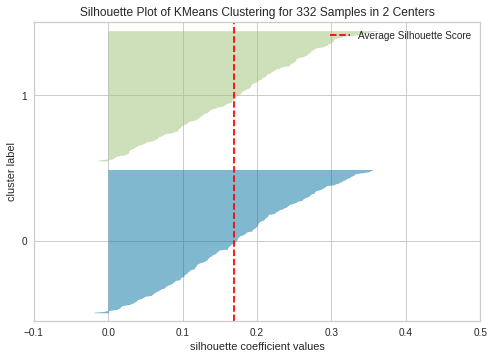

In [ ]:
print('k = 2 일때')
kmeans_2 = KMeans(n_clusters=2, random_state=42, init='k-means++')
#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(df2_scaled)
visualizer_2.show()

In [ ]:
df3 = df2_scaled.copy()

In [ ]:
print('k = 3 일 때')
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(df3)
df3['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df2_scaled, df3['cluster'])
# print(score_samples.shape)
# print(score_samples)
df3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df2_scaled, df3['cluster'])
print(average_score)
print(df3.groupby('cluster')['silhoutte_coeff'].count())
print(df3.groupby('cluster')['silhoutte_coeff'].mean())
print(np.var(df3['silhoutte_coeff']))

k = 3 일 때
0.16301211557186226
cluster
0     75
1    133
2    124
Name: silhoutte_coeff, dtype: int64
cluster
0    0.184865
1    0.233321
2    0.074382
Name: silhoutte_coeff, dtype: float64
0.015520294764050983


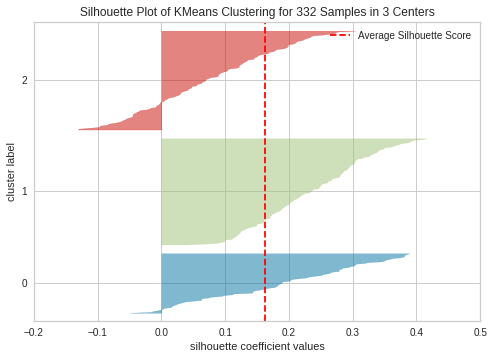

In [ ]:
# k = 3 일때
kmeans_3 = KMeans(n_clusters=3, random_state=42, init='k-means++')
#visualizer 생성
visualizer_3 = SilhouetteVisualizer(kmeans_3, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_3.fit(df2_scaled)
visualizer_3.show()

In [ ]:
df3 = df2_scaled.copy()

In [ ]:
print('k = 4 일 때')
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(df3)
df3['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df2_scaled, df3['cluster'])
# print(score_samples.shape)
# print(score_samples)
df3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df2_scaled, df3['cluster'])
print(average_score)
print(df3.groupby('cluster')['silhoutte_coeff'].count())
print(df3.groupby('cluster')['silhoutte_coeff'].mean())
print(np.var(df3['silhoutte_coeff']))

k = 4 일 때
0.17650596010014663
cluster
0     75
1    101
2     95
3     61
Name: silhoutte_coeff, dtype: int64
cluster
0    0.176032
1    0.163587
2    0.231707
3    0.112510
Name: silhoutte_coeff, dtype: float64
0.014614943206889027


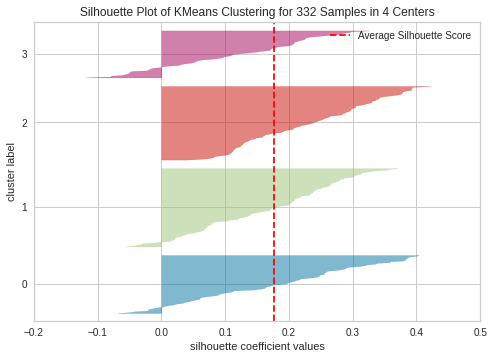

In [ ]:
# k = 4 일때
kmeans_4 = KMeans(n_clusters=4, random_state=42, init='k-means++')
#visualizer 생성
visualizer_4 = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_4.fit(df2_scaled)
visualizer_4.show()

In [ ]:
df3 = df2_scaled.copy()

In [ ]:
print('k = 5 일 때')
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(df3)
df3['cluster'] = kmeans.labels_

score_samples = silhouette_samples(df2_scaled, df3['cluster'])
# print(score_samples.shape)
# print(score_samples)
df3['silhoutte_coeff'] = score_samples

average_score = silhouette_score(df2_scaled, df3['cluster'])
print(average_score)
print(df3.groupby('cluster')['silhoutte_coeff'].count())
print(df3.groupby('cluster')['silhoutte_coeff'].mean())
print(np.var(df3['silhoutte_coeff']))

k = 5 일 때
0.2119852049140914
cluster
0     59
1    148
2     61
3     25
4     39
Name: silhoutte_coeff, dtype: int64
cluster
0    0.111063
1    0.299978
2    0.159540
3    0.140155
4    0.158818
Name: silhoutte_coeff, dtype: float64
0.021491647261885325


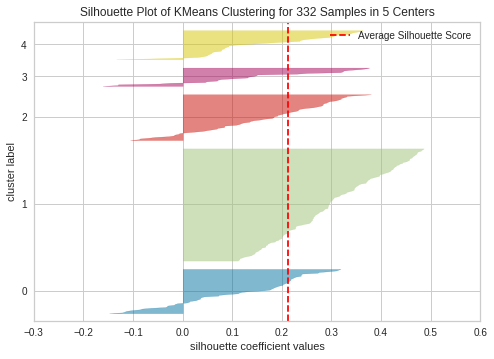

In [ ]:
# k = 5 일때
kmeans_5 = KMeans(n_clusters=5, random_state=42, init='k-means++')
#visualizer 생성
visualizer_5 = SilhouetteVisualizer(kmeans_5, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_5.fit(df2_scaled)
visualizer_5.show()

## Hierarchical 실루엣 시작.

In [ ]:
final_sc = df2.copy()
X_sc = df2_scaled.copy()

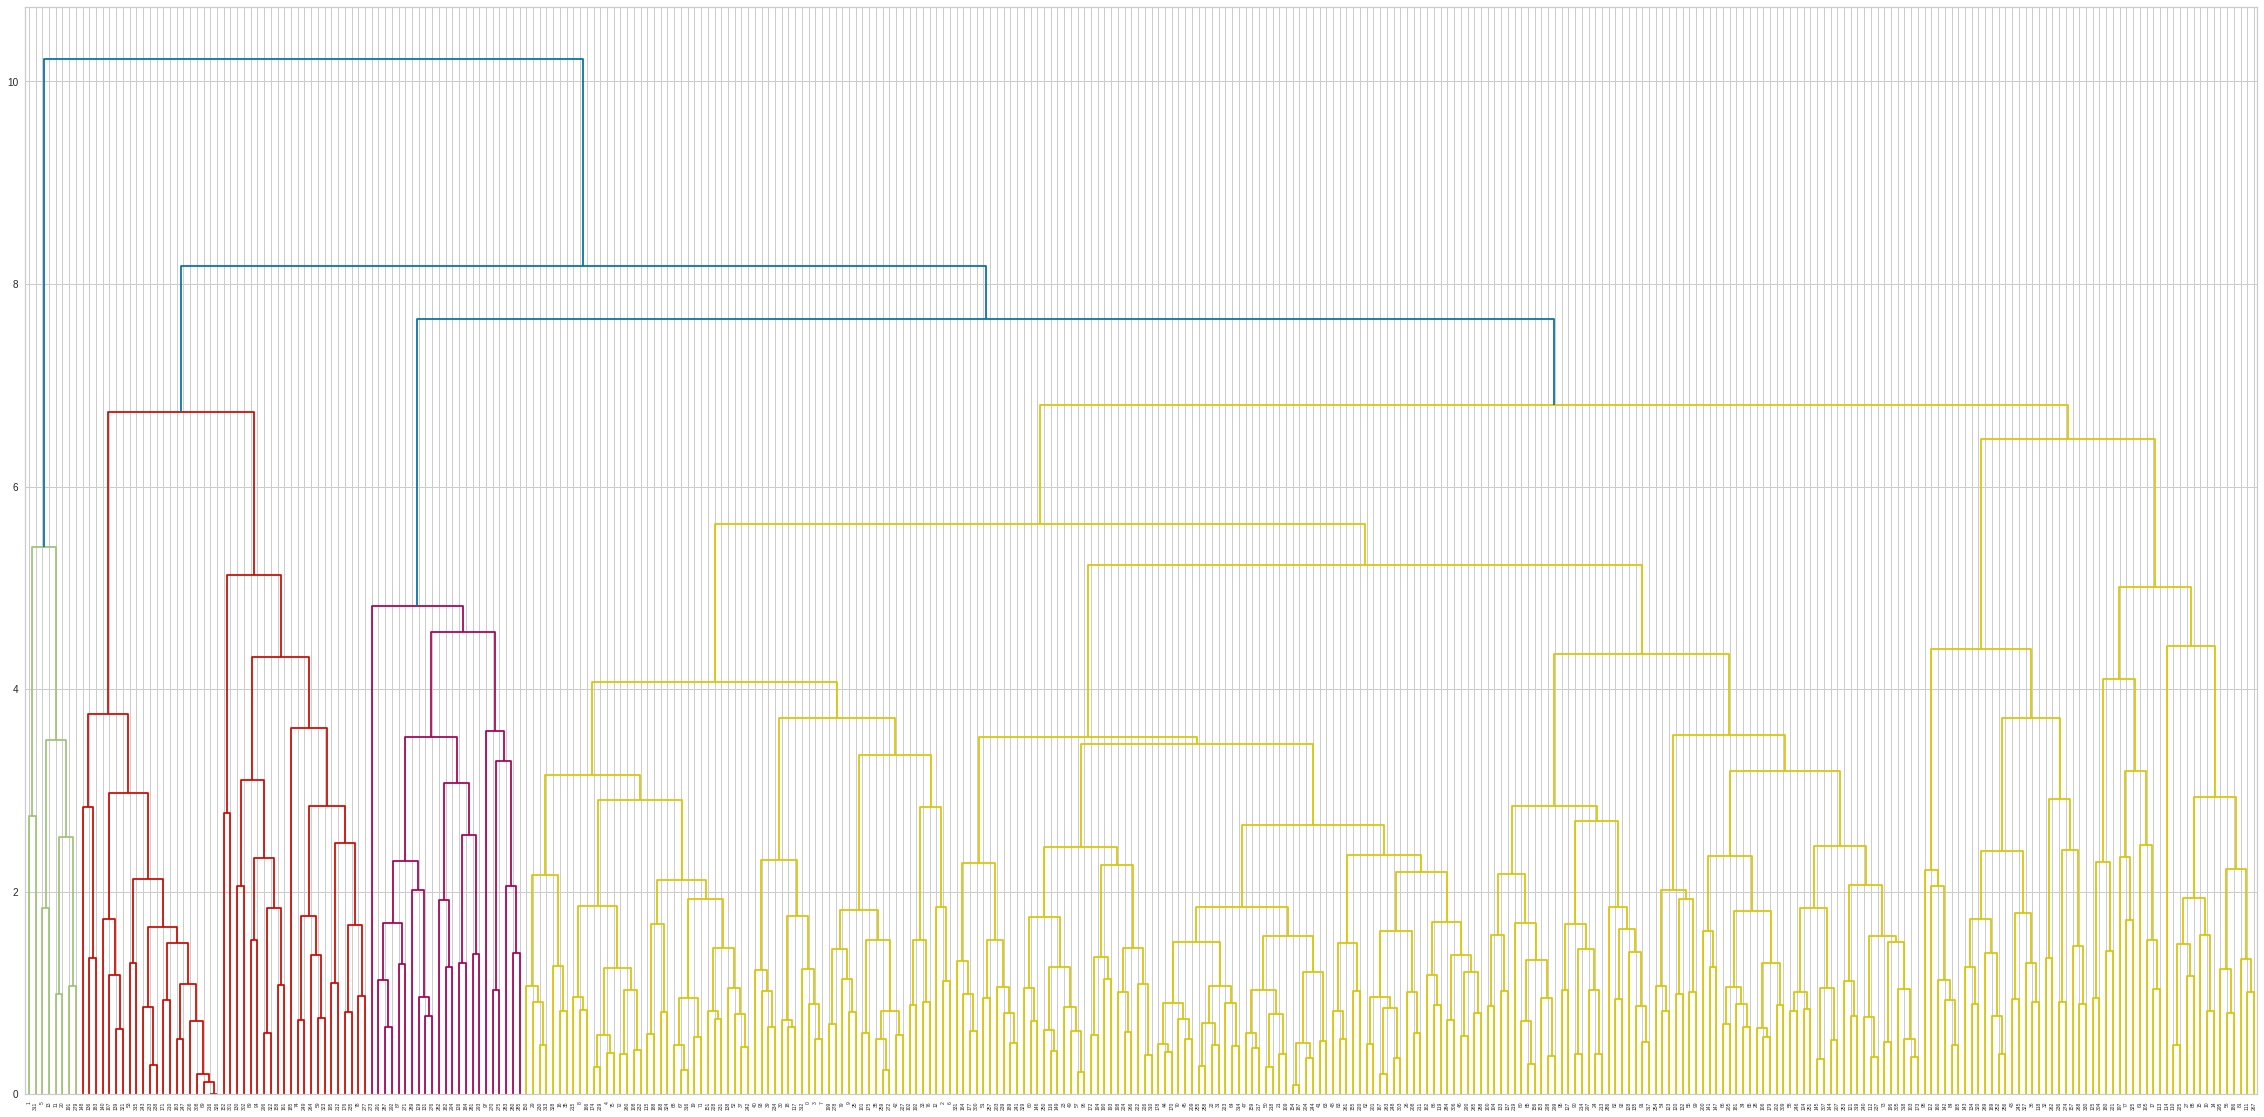

In [ ]:
# sc 스케일링한 데이터 덴드로그램 그리기 for t 
clusters = linkage(y=X_sc, method='complete', metric='euclidean')
plt.figure(figsize=(40,20))

dendrogram(clusters)
plt.show()

In [ ]:
# 함수 만들기 - 군집개수, 각 군집당 실루엣 계수, 분산
def silhouette_hc(final_, X, t) :
    clusters = linkage(y=X, method = 'complete', metric = 'euclidean')
    cut_tree = fcluster(clusters, t = t, criterion = 'distance')
    final_['cluster'] = cut_tree # 예측값 넣기 
    final_['silhouette_coeff'] = silhouette_samples(X, final_['cluster'])
    n_group = len(np.unique(final_['cluster']) )

    avg_score = silhouette_score(X, final_['cluster'])
    avg_by_count = final_.groupby('cluster')['silhouette_coeff'].count()
    avg_by_cluster = final_.groupby('cluster')['silhouette_coeff'].mean()
    var = np.var(final_sc['silhouette_coeff'])
    
    print('군집 계수 :   ',n_group)
    print('군집 개수 : ',avg_by_count)
    print('실루엣평균 :  ',avg_score)
    print('군집 분산 :   ',var)
    print(avg_by_cluster)

In [ ]:
# n_cluster가 
silhouette_hc(final_sc, X_sc, t=10)

군집 계수 :    2
군집 개수 :  cluster
1      8
2    324
Name: silhouette_coeff, dtype: int64
실루엣평균 :   0.43513934632947154
군집 분산 :    0.016919639491036153
cluster
1    0.458960
2    0.434551
Name: silhouette_coeff, dtype: float64


In [ ]:
silhouette_hc(final_sc, X_sc, t=8)

군집 계수 :    3
군집 개수 :  cluster
1      8
2     43
3    281
Name: silhouette_coeff, dtype: int64
실루엣평균 :   0.21300947492004824
군집 분산 :    0.024050868944121985
cluster
1    0.443671
2    0.302640
3    0.192727
Name: silhouette_coeff, dtype: float64


In [ ]:
silhouette_hc(final_sc, X_sc, t=7)

군집 계수 :    4
군집 개수 :  cluster
1      8
2     43
3     23
4    258
Name: silhouette_coeff, dtype: int64
실루엣평균 :   0.21990944381103
군집 분산 :    0.02538539708843803
cluster
1    0.426186
2    0.275737
3    0.294367
4    0.197571
Name: silhouette_coeff, dtype: float64


In [ ]:
silhouette_hc(final_sc, X_sc, t=6.8)

군집 계수 :    5
군집 개수 :  cluster
1      8
2     43
3     23
4    208
5     50
Name: silhouette_coeff, dtype: int64
실루엣평균 :   0.2001546746432442
군집 분산 :    0.02934445349622613
cluster
1    0.406341
2    0.252577
3    0.268461
4    0.219273
5    0.011130
Name: silhouette_coeff, dtype: float64
